# **Data-Science Fundamentals Final Project: predicting flights using ML algorithms**

## Stage No. 1: collecting the data:
- for this stage we will use a web scraper-collector that will collect flights data from two websites: Kiwi and Kayak.
- this collector is built with async-runtime functions, random user-actions generator, session saver, cookies saver, dynamic viewport and even DHCP-ip-refresher function (since were not using proxy), all of these methods are used for collecting without getting cought by these websities bot-identifier machenisms...
- this collector will run every combination of ttt (time to travel) from 1-30, los (lenght of stay) from 1-5 within a 3 different snapshot days for every combination of rome,london and paris routes

In [ ]:
%pip install -e scraping
%pip install -r ./requirements.txt
%playwrite install

In [ ]:
from scraping.flights_scraping import get_data


get_data()


After we have collected the data: were doing the usual imports:

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

## Stage 2: Exploring the data

In [86]:
data = pd.read_csv('Flights.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493311 entries, 0 to 493310
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   departure_hour            459813 non-null  object
 1   departure_airport         454590 non-null  object
 2   flight_length             459813 non-null  object
 3   landing_hour              455578 non-null  object
 4   landing_airport           455311 non-null  object
 5   to_dest_company           451136 non-null  object
 6   return_departure_hour     459813 non-null  object
 7   return_departure_airport  454618 non-null  object
 8   return_flight_length      459813 non-null  object
 9   return_landing_hour       454618 non-null  object
 10  return_landing_airport    455311 non-null  object
 11  return_company            451136 non-null  object
 12  price                     459813 non-null  object
 13  layover                   493311 non-null  bool  
 14  ttt 

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493311 entries, 0 to 493310
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   departure_hour            459813 non-null  object
 1   departure_airport         454590 non-null  object
 2   flight_length             459813 non-null  object
 3   landing_hour              455578 non-null  object
 4   landing_airport           455311 non-null  object
 5   to_dest_company           451136 non-null  object
 6   return_departure_hour     459813 non-null  object
 7   return_departure_airport  454618 non-null  object
 8   return_flight_length      459813 non-null  object
 9   return_landing_hour       454618 non-null  object
 10  return_landing_airport    455311 non-null  object
 11  return_company            451136 non-null  object
 12  price                     459813 non-null  object
 13  layover                   493311 non-null  bool  
 14  ttt 

In [88]:

data.head()

,departure_hour,departure_airport,flight_length,landing_hour,landing_airport,to_dest_company,return_departure_hour,return_departure_airport,return_flight_length,return_landing_hour,return_landing_airport,return_company,price,layover,ttt,los,snapshot_date,origin_city,destination_city,departure_date,return_date,website,layover_time,return_layover_time
0,6:00a,CIA,2h 45m,7:45a,STN,Ryanair,6:10p,STN,2h 25m,9:35p,CIA,Ryanair,$168,False,2,1,2025-02-28,ROME,LONDON,2025-03-02,2025-03-03,Kayak,0m,0m
1,6:35a,FCO,2h 45m,8:20a,LGW,Wizz Air,9:10a,STN,2h 30m,12:40p,FCO,Jet2,$157,False,2,1,2025-02-28,ROME,LONDON,2025-03-02,2025-03-03,Kayak,0m,0m
2,6:35a,FCO,2h 45m,8:20a,LGW,Wizz Air,6:10p,STN,2h 25m,9:35p,CIA,Ryanair,$166,False,2,1,2025-02-28,ROME,LONDON,2025-03-02,2025-03-03,Kayak,0m,0m
3,6:00a,CIA,2h 45m,7:45a,STN,Ryanair,6:10p,STN,2h 25m,9:35p,CIA,Ryanair,$168,False,2,1,2025-02-28,ROME,LONDON,2025-03-02,2025-03-03,Kayak,0m,0m
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,1,2025-02-28,ROME,LONDON,2025-03-02,2025-03-03,Kayak,0m,0m


Remove duplicates and nulls

In [89]:
data = data.drop_duplicates()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436873 entries, 0 to 493310
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   departure_hour            436873 non-null  object
 1   departure_airport         436873 non-null  object
 2   flight_length             436873 non-null  object
 3   landing_hour              436873 non-null  object
 4   landing_airport           436873 non-null  object
 5   to_dest_company           436873 non-null  object
 6   return_departure_hour     436873 non-null  object
 7   return_departure_airport  436873 non-null  object
 8   return_flight_length      436873 non-null  object
 9   return_landing_hour       436873 non-null  object
 10  return_landing_airport    436873 non-null  object
 11  return_company            436873 non-null  object
 12  price                     436873 non-null  object
 13  layover                   436873 non-null  bool  
 14  ttt      

we will add a function that will convert the time strings to int (in minutes)

In [91]:

import re
def time_to_minutes(time_str: str)-> int:
    if pd.isna(time_str):
        return 0

    # Extract hours and minutes using regex
    hours = 0
    minutes = 0
    
    h_match = re.search(r'(\d+)h', time_str)
    m_match = re.search(r'(\d+)m', time_str)

    if h_match:
        hours = int(h_match.group(1))
    if m_match:
        minutes = int(m_match.group(1))

    return hours * 60 + minutes

In [92]:
data['flight_length'] = data['flight_length'].apply(time_to_minutes)
data['return_flight_length'] = data['return_flight_length'].apply(time_to_minutes)
data['layover_time'] = data['layover_time'].apply(time_to_minutes)
data['return_layover_time'] = data['return_layover_time'].apply(time_to_minutes)

lets convert the hours to int format

In [93]:
from datetime import datetime
def hour_to_numeric(hour_str):
    hour_str = hour_str.strip()  

    
    match = re.search(r"\+(\d+)", hour_str)
    extra_days = int(match.group(1)) if match else 0
    hour_str = re.sub(r"\+\d+", "", hour_str)

    
    if 'a' in hour_str or 'p' in hour_str:
        hour_str = hour_str.replace('a', 'AM').replace('p', 'PM')
        time_obj = datetime.strptime(hour_str, "%I:%M%p")
    else:
        time_obj = datetime.strptime(hour_str, "%H:%M")

    hour_float = time_obj.hour + time_obj.minute / 60

    hour_float += extra_days * 24

    return hour_float


data['departure_hour'] = data['departure_hour'].apply(hour_to_numeric)
data['landing_hour'] = data['landing_hour'].apply(hour_to_numeric)
data['return_departure_hour'] = data['return_departure_hour'].apply(hour_to_numeric)
data['return_landing_hour'] = data['return_landing_hour'].apply(hour_to_numeric)


the price is still an object! we need to convert it to numerical... (with scraping knowlage i know that kiwi gives the price in nis and kayak in $)

In [94]:
%pip install currencyconverter

Note: you may need to restart the kernel to use updated packages.


In [95]:
from currency_converter import CurrencyConverter

c = CurrencyConverter()

data['price'] = data['price'].apply(
    lambda x: (
        c.convert(float(x.replace('₪ ', '').replace(',', '')), 'ILS', 'USD') if '₪ ' in x
        else float(x.replace('$', '').replace(',', '')) if '$' in x 
        else None 
    )
)


we know that dates are tied to day of week, lets create new feature based on the departure date!

In [96]:

data['departure_date'] = pd.to_datetime(data['departure_date'])
    
data['day_of_week'] = data['departure_date'].dt.day_name()

lets create new feature based on the origin_city and destination_city

In [ ]:
data['route'] = data['origin_city'] + ' → ' + data['destination_city']

In [98]:
pd.set_option('display.max_columns', None)
data.head()

,departure_hour,departure_airport,flight_length,landing_hour,landing_airport,to_dest_company,return_departure_hour,return_departure_airport,return_flight_length,return_landing_hour,return_landing_airport,return_company,price,layover,ttt,los,snapshot_date,departure_date,return_date,website,layover_time,return_layover_time,day_of_week,route
0,6.000000,CIA,165,7.750000,STN,Ryanair,18.166667,STN,145,21.583333,CIA,Ryanair,168.0,False,2,1,2025-02-28,2025-03-02,2025-03-03,Kayak,0,0,Sunday,ROME → LONDON
1,6.583333,FCO,165,8.333333,LGW,Wizz Air,9.166667,STN,150,12.666667,FCO,Jet2,157.0,False,2,1,2025-02-28,2025-03-02,2025-03-03,Kayak,0,0,Sunday,ROME → LONDON
2,6.583333,FCO,165,8.333333,LGW,Wizz Air,18.166667,STN,145,21.583333,CIA,Ryanair,166.0,False,2,1,2025-02-28,2025-03-02,2025-03-03,Kayak,0,0,Sunday,ROME → LONDON
5,6.583333,FCO,165,8.333333,LGW,Wizz Air,21.000000,LGW,150,24.500000,FCO,Wizz Air,165.0,False,2,1,2025-02-28,2025-03-02,2025-03-03,Kayak,0,0,Sunday,ROME → LONDON
6,6.583333,FCO,165,8.333333,LGW,Wizz Air,6.250000,STN,145,9.666667,CIA,Ryanair,168.0,False,2,1,2025-02-28,2025-03-02,2025-03-03,Kayak,0,0,Sunday,ROME → LONDON


fancy distribution graphs

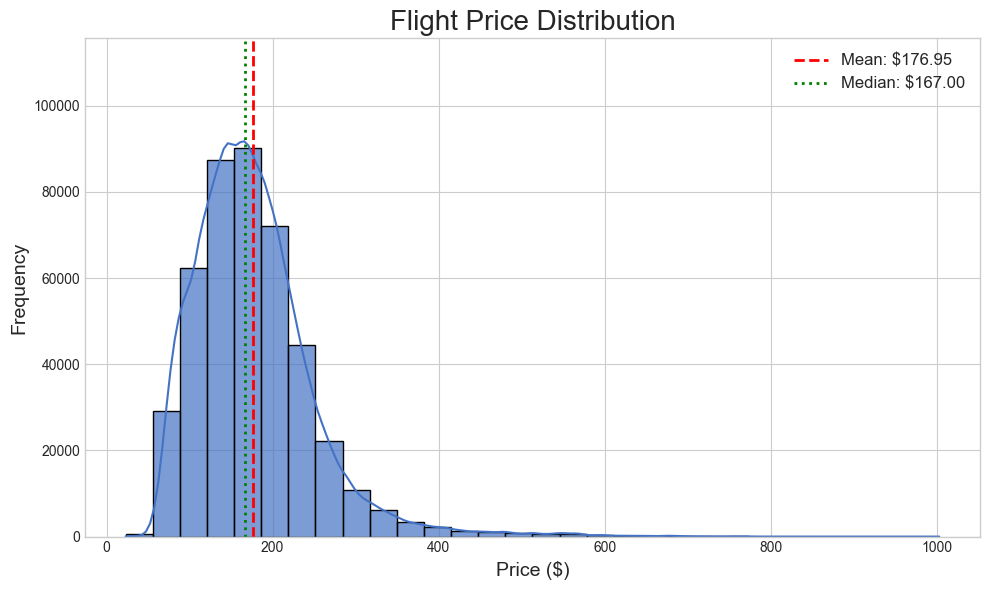

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))
plt.title('Flight Price Distribution', fontsize=20)

sns.histplot(data['price'].dropna(), bins=30, kde=True, color='#4472C4', 
             edgecolor='black', alpha=0.7)

mean_price = data['price'].mean()
median_price = data['price'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle=':', linewidth=2, 
            label=f'Median: ${median_price:.2f}')

plt.ylim(0, plt.ylim()[1] * 1.2)

plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Text(720.7386363636361, 0.5, 'Price ($)')

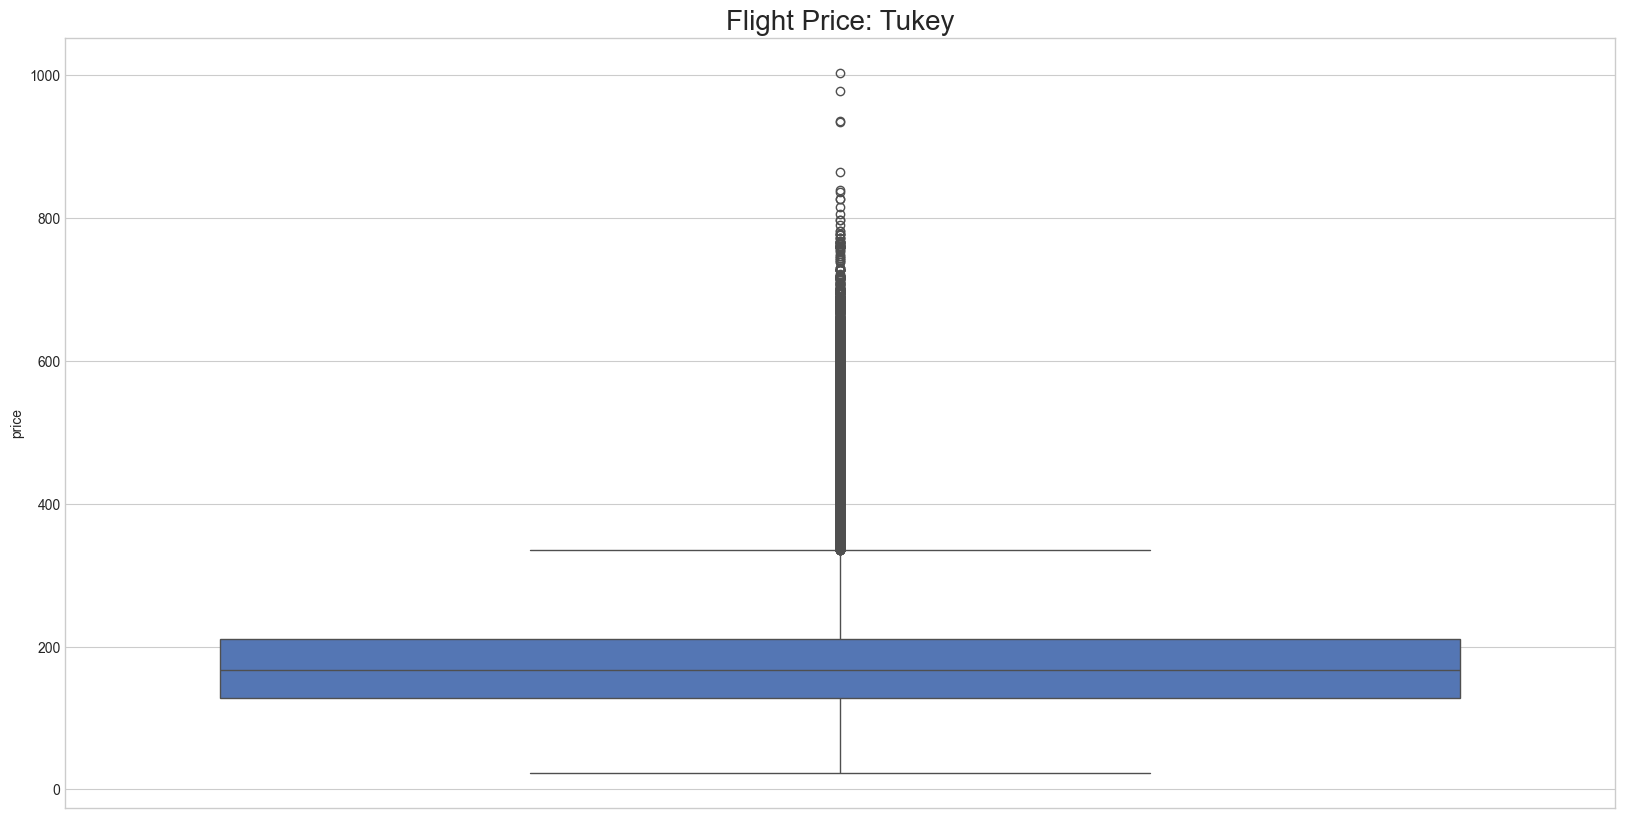

In [125]:
plt.figure(figsize=(20, 10))
plt.title('Flight Price: Tukey', fontsize=20)
sns.boxplot(y=data['price'].dropna(), color='#4472C4')
axes[0, 1].set_title('Price Box Plot', fontsize=14)
axes[0, 1].set_ylabel('Price ($)', fontsize=12)

by company

In [134]:
data['to_dest_company'].value_counts()

to_dest_company
easyJet                  121360
Vueling                   97014
Ryanair                   76422
Wizz Air                  34636
ITA Airways               26677
British Airways           26492
Transavia France          18721
Air France                12428
Wizz Air Malta            10191
Jet2                       5081
Iberia                     4004
Multiple airlines          2262
Scandinavian Airlines       316
Eurostar                    308
Wizz Air UK                 220
Eurowings                   138
Tunisair                    110
Lufthansa                    96
SAS                          94
KM Malta Airlines            71
Aeroitalia                   68
KLM                          64
Ryanair UK                   35
SWISS                        29
Volotea                      18
Norwegian                     5
FlixBus                       4
Austrian Airlines             3
BlaBlaBus                     2
TAP AIR PORTUGAL              2
Union Ivkoni            

In [135]:
data['return_company'].value_counts()

return_company
easyJet                  120983
Vueling                   95250
Ryanair                   73662
Wizz Air                  34643
British Airways           29571
ITA Airways               28784
Transavia France          18927
Air France                12224
Wizz Air Malta            10407
Jet2                       4613
Iberia                     4194
Multiple airlines          2190
Eurostar                    336
Wizz Air UK                 314
Scandinavian Airlines       161
KLM                         104
Eurowings                    80
Ryanair UK                   77
Volotea                      72
Lufthansa                    67
Tunisair                     56
SAS                          54
SWISS                        35
Aeroitalia                   31
KM Malta Airlines            23
BlaBlaBus                     4
FlixBus                       3
Air Serbia                    2
Norwegian                     2
Luxair                        2
Air Algerie              

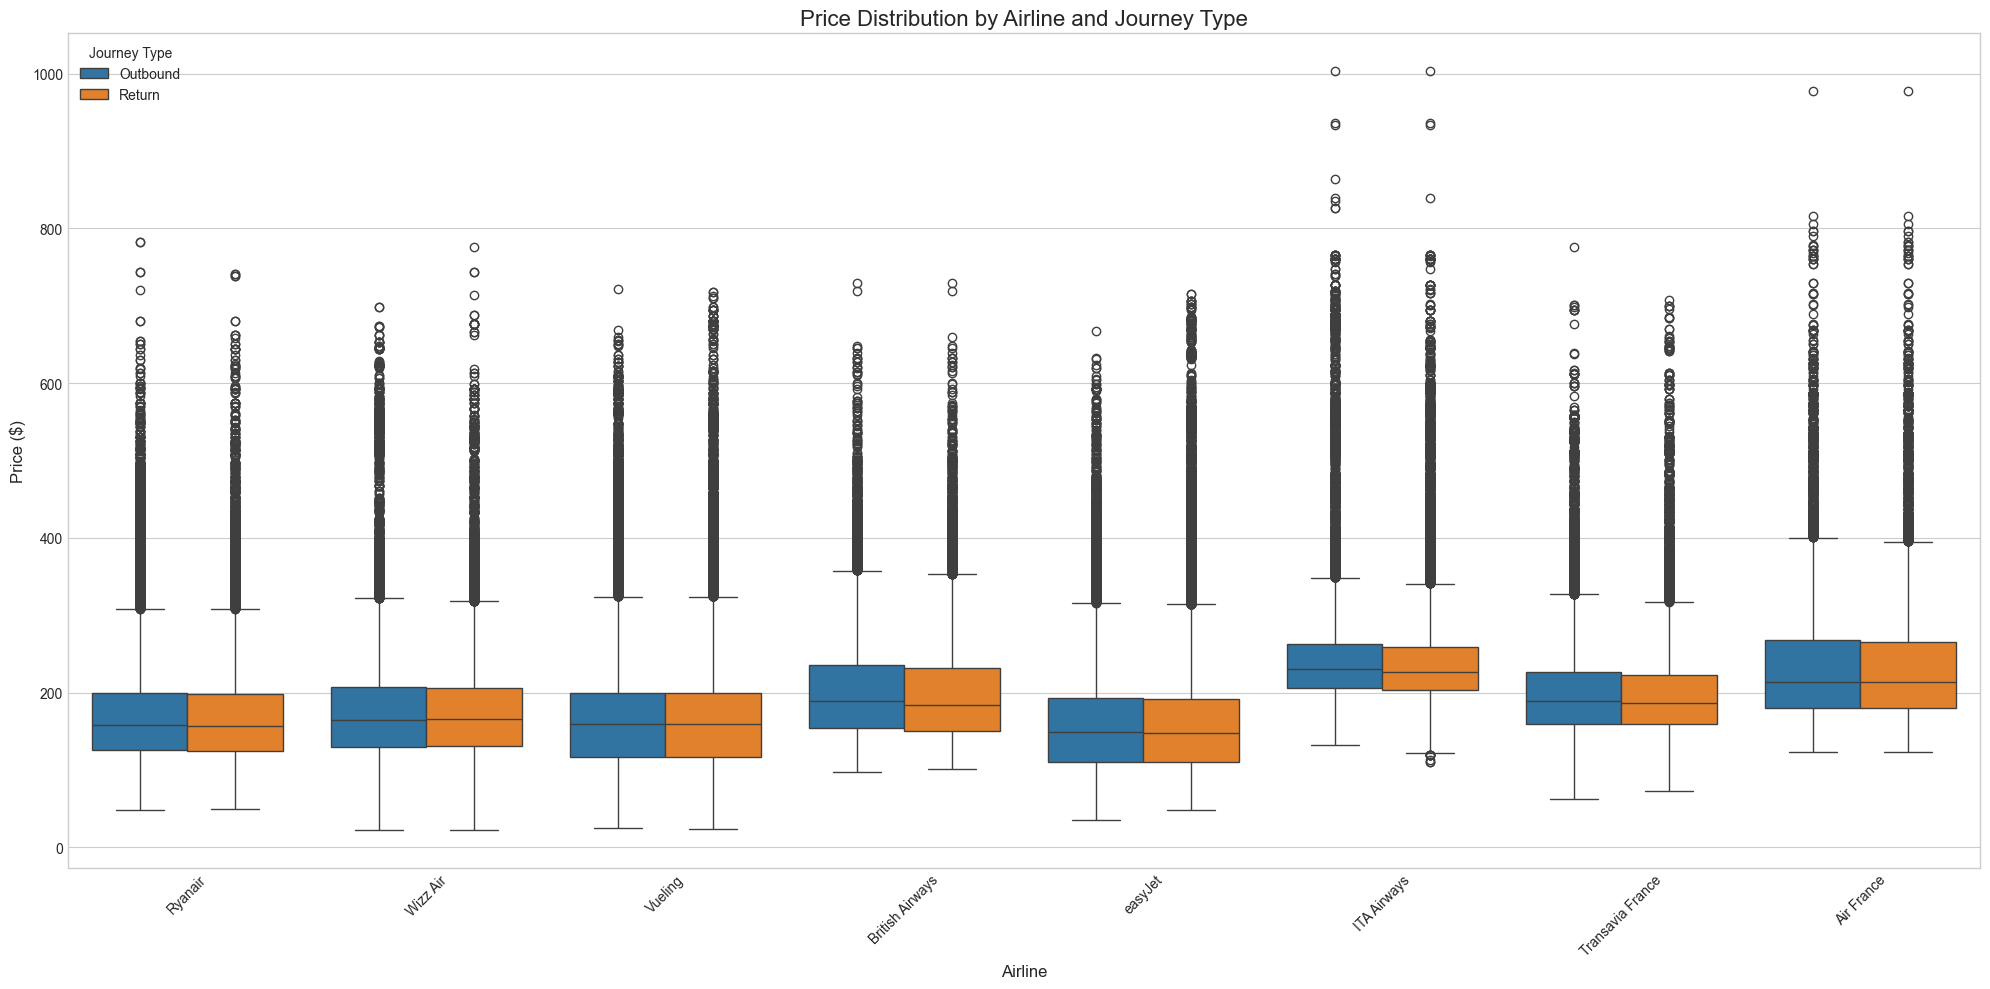

In [ ]:
plt.figure(figsize=(20, 10))

# Prepare outbound data
outbound_data = data[['price', 'to_dest_company']].copy()
outbound_data['journey_type'] = 'Outbound'
outbound_data.rename(columns={'to_dest_company': 'company'}, inplace=True)

# Prepare return data
return_data = data[['price', 'return_company']].copy()
return_data['journey_type'] = 'Return'
return_data.rename(columns={'return_company': 'company'}, inplace=True)

# Combine both datasets
combined_data = pd.concat([outbound_data, return_data])

# Get the top 10 most frequent airlines
top_airlines = combined_data['company'].value_counts().nlargest(8).index.tolist()
combined_data_filtered = combined_data[combined_data['company'].isin(top_airlines)]

# Create the boxplot
sns.boxplot(x='company', y='price', hue='journey_type', data=combined_data_filtered)

# Set labels and title
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price Distribution by Airline and Journey Type', fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Journey Type')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/f0/l96rg_wj4qvg_lzh89qycdgc0000gn/T/ipykernel_36374/3475506826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='route', y='price', data=routes_data, palette='Set2')


Text(0, 0.5, 'Price ($)')

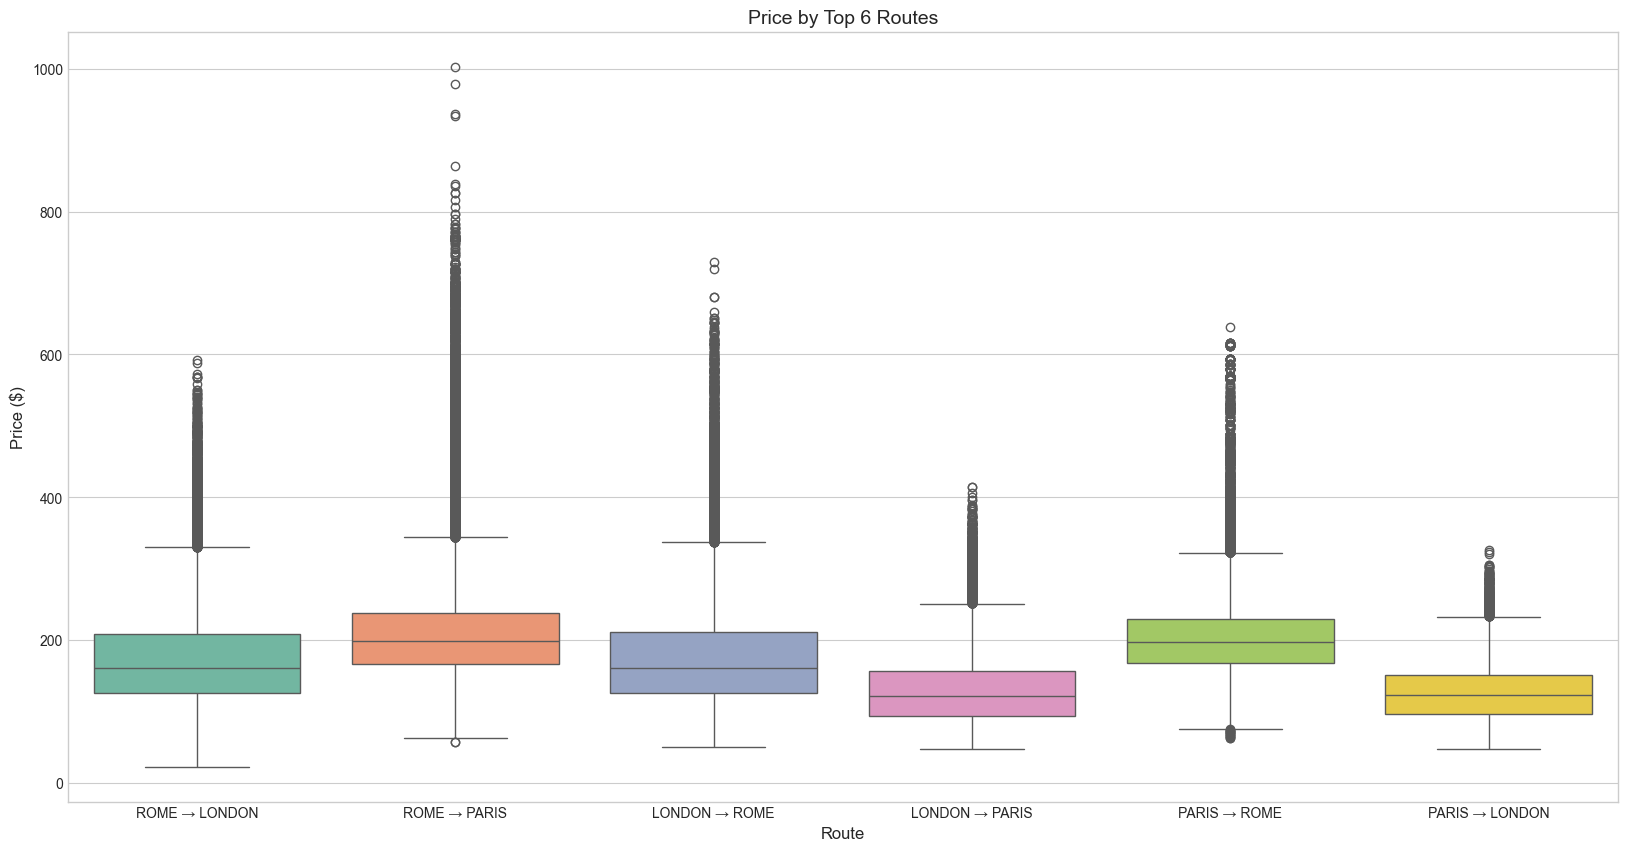

In [ ]:
plt.figure(figsize=(20, 10))
top_routes = data['route'].value_counts().nlargest(6).index.tolist()
routes_data = data[data['route'].isin(top_routes)]

sns.boxplot(x='route', y='price', data=routes_data, palette='Set2')
plt.title('Price by Top 6 Routes', fontsize=14)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

weekdays

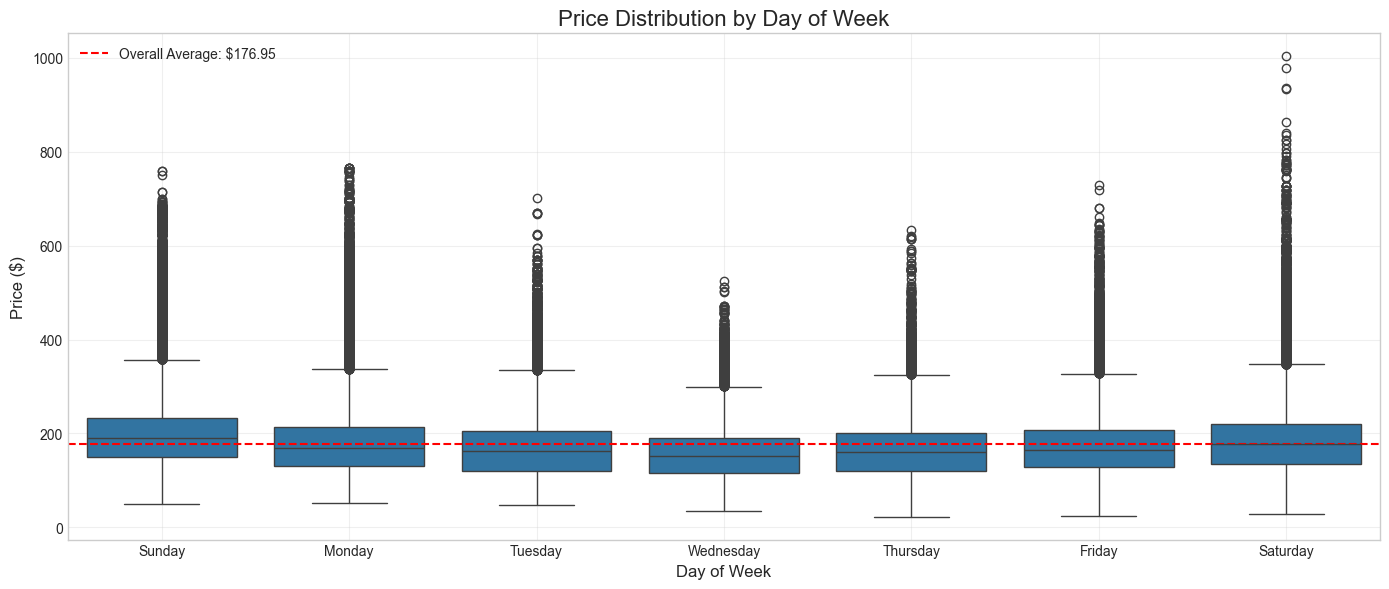

In [139]:
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    
# Create figure
fig = plt.figure(figsize=(14, 6))

# Plot
sns.boxplot(x='day_of_week', y='price', data=data, order=week_order)
plt.title('Price Distribution by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add average line
plt.axhline(y=data['price'].mean(), color='r', linestyle='--', 
            label=f'Overall Average: ${data["price"].mean():.2f}')
plt.legend()

plt.tight_layout()

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

def plot_detailed_distribution(df):
    """
    Creates a detailed price distribution analysis with histogram, KDE, and ECDF plots.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing flight data with a 'price' column
    
    Returns:
    matplotlib.figure.Figure: The figure containing the visualizations
    """
    # Create a subplot layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Detailed Price Distribution Analysis', fontsize=16)

    # Left plot: Histogram with KDE
    sns.histplot(df['price'].dropna(), bins=50, kde=True, ax=ax1, color='#4472C4', 
                 alpha=0.7, edgecolor='black', line_kws={'linewidth': 2})
    ax1.set_title('Price Distribution with Density Curve', fontsize=14)
    ax1.set_xlabel('Price ($)', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)

    # Add reference lines for percentiles
    percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
    colors = ['#FF9999', '#FFCC99', '#99FF99', '#FFCC99', '#FF9999']
    labels = ['10th', '25th', '50th', '75th', '90th']

    for i, p in enumerate(percentiles):
        value = df['price'].quantile(p)
        ax1.axvline(value, color=colors[i], linestyle='--', alpha=0.7, 
                   label=f'{labels[i]}: ${value:.2f}')

    ax1.legend(fontsize=9, title='Percentiles')

    # Right plot: ECDF (Empirical Cumulative Distribution Function)
    ecdf = ECDF(df['price'].dropna())
    ax2.plot(ecdf.x, ecdf.y * 100, linewidth=2, color='#4472C4')
    ax2.set_title('Cumulative Price Distribution', fontsize=14)
    ax2.set_xlabel('Price ($)', fontsize=12)
    ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add reference lines for key price points
    for i, p in enumerate(percentiles):
        value = df['price'].quantile(p)
        y_val = p * 100
        ax2.axhline(y=y_val, color=colors[i], linestyle='--', alpha=0.3)
        ax2.axvline(x=value, color=colors[i], linestyle='--', alpha=0.3)
        ax2.annotate(f'${value:.2f} ({y_val}%)', xy=(value, y_val), 
                    xytext=(10, 0), textcoords='offset points', fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    return fig

    """
    Creates a visualization of price distribution by day of week.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing flight data with 'price' and 'departure_date' columns
    
    Returns:
    matplotlib.figure.Figure or None: The figure containing the visualization or None if required data is missing
    """
    if 'departure_date' not in df.columns:
        print("Day of week analysis not possible: 'departure_date' column is missing")
        return None
        
    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()
    
    # Convert to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df_copy['departure_date']):
        df_copy['departure_date'] = pd.to_datetime(df_copy['departure_date'])
    
    # Extract day of week
    df_copy['day_of_week'] = df_copy['departure_date'].dt.day_name()
    
    # Define week order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Create figure
    fig = plt.figure(figsize=(14, 6))
    
    # Plot
    sns.boxplot(x='day_of_week', y='price', data=df_copy, order=week_order)
    plt.title('Price Distribution by Day of Week', fontsize=16)
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add average line
    plt.axhline(y=df_copy['price'].mean(), color='r', linestyle='--', 
                label=f'Overall Average: ${df_copy["price"].mean():.2f}')
    plt.legend()
    
    plt.tight_layout()
    
    return fig

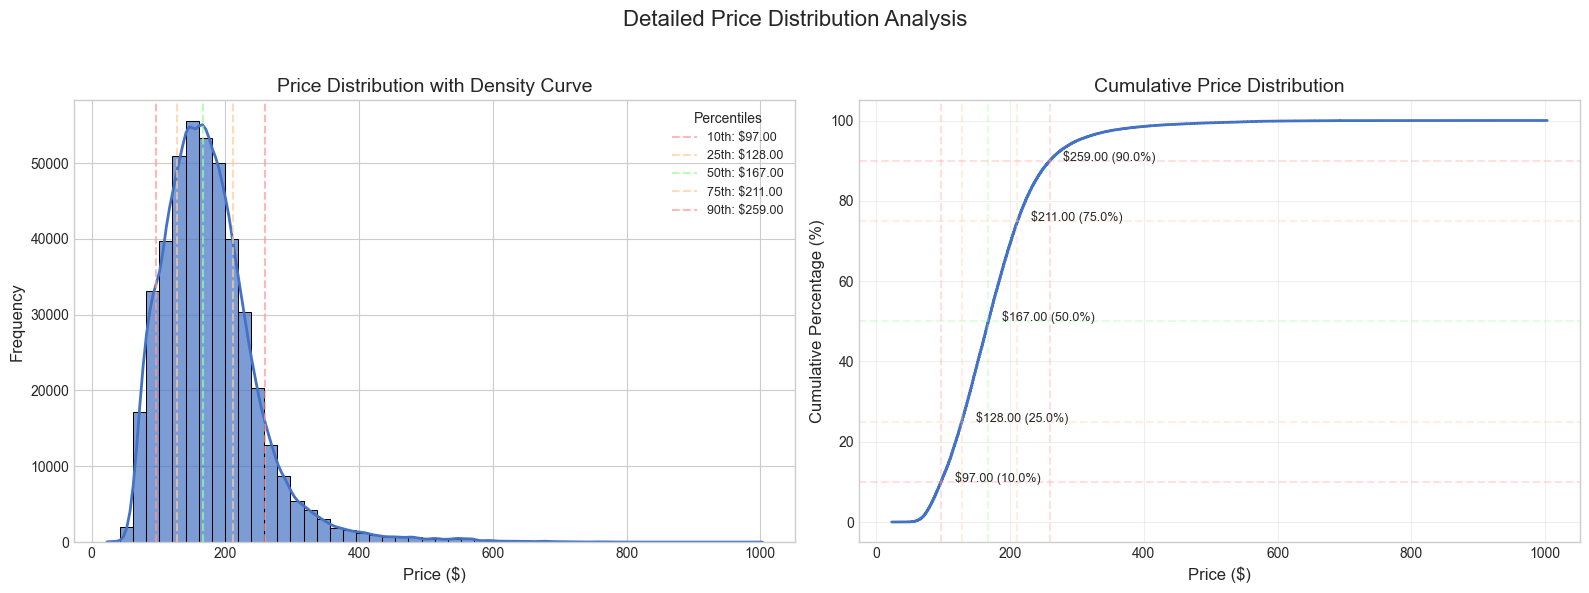

In [82]:
fig2 = plot_detailed_distribution(df)
plt.show()

In [ ]:
# Add this new function to analyze more specific aspects of your dataset

def plot_advanced_flight_analysis(df):
    """
    Creates visualizations for advanced flight price analysis based on airports,
    time of day, airlines, and connection types.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing detailed flight data
    
    Returns:
    matplotlib.figure.Figure: The figure containing the visualizations
    """
    # Create a 2x2 grid for additional analyses
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Advanced Flight Price Analysis', fontsize=20, y=0.98)
    
    # 1. Airport pair analysis (top-left)
    if all(col in df.columns for col in ['departure_airport', 'landing_airport']):
        # Create airport pairs
        df['airport_pair'] = df['departure_airport'] + ' → ' + df['landing_airport']
        
        # Get top 6 most common airport pairs
        top_pairs = df['airport_pair'].value_counts().nlargest(6).index.tolist()
        airport_pair_df = df[df['airport_pair'].isin(top_pairs)]
        
        # Create violin plot to show distribution
        sns.violinplot(x='airport_pair', y='price', data=airport_pair_df, ax=axes[0, 0], 
                      palette='coolwarm', cut=0, inner='quartile')
        axes[0, 0].set_title('Price Distribution by Airport Pair', fontsize=14)
        axes[0, 0].set_xlabel('Airport Pair', fontsize=12)
        axes[0, 0].set_ylabel('Price (€)', fontsize=12)
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Add median prices
        medians = airport_pair_df.groupby('airport_pair')['price'].median()
        for i, pair in enumerate(axes[0, 0].get_xticklabels()):
            if pair.get_text() in medians.index:
                axes[0, 0].text(i, medians[pair.get_text()], f'€{medians[pair.get_text()]:.0f}', 
                              ha='center', va='bottom', fontsize=9, color='black')
    else:
        axes[0, 0].text(0.5, 0.5, 'Airport pair data not available', 
                      ha='center', va='center', fontsize=12)
        
    # 2. Time of day analysis (top-right)
    if 'departure_hour' in df.columns:
        # Create time categories
        df['time_category'] = pd.cut(
            df['departure_hour'], 
            bins=[0, 6, 12, 18, 24],
            labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
        )
        
        # Create box plot
        sns.boxplot(x='time_category', y='price', data=df, ax=axes[0, 1], palette='viridis')
        axes[0, 1].set_title('Price by Departure Time', fontsize=14)
        axes[0, 1].set_xlabel('Time of Day', fontsize=12)
        axes[0, 1].set_ylabel('Price (€)', fontsize=12)
        
        # Add count and mean annotations
        for i, category in enumerate(df['time_category'].cat.categories):
            count = df[df['time_category'] == category].shape[0]
            mean = df[df['time_category'] == category]['price'].mean()
            axes[0, 1].annotate(f'n={count}\nμ=€{mean:.1f}', 
                              xy=(i, df['price'].min()), 
                              ha='center', va='bottom', fontsize=9)
    else:
        axes[0, 1].text(0.5, 0.5, 'Departure time data not available', 
                      ha='center', va='center', fontsize=12)
        
    # 3. Airline comparison (bottom-left)
    if 'to_dest_company' in df.columns:
        # Get top 5 airlines by frequency
        top_airlines = df['to_dest_company'].value_counts().nlargest(5).index.tolist()
        airline_df = df[df['to_dest_company'].isin(top_airlines)]
        
        # Create violin plot
        sns.violinplot(x='to_dest_company', y='price', data=airline_df, ax=axes[1, 0], 
                      palette='Set3', cut=0, inner='quartile')
        axes[1, 0].set_title('Price Distribution by Airline', fontsize=14)
        axes[1, 0].set_xlabel('Airline', fontsize=12)
        axes[1, 0].set_ylabel('Price (€)', fontsize=12)
        
        # Add statistics
        for i, airline in enumerate(top_airlines):
            airline_data = airline_df[airline_df['to_dest_company'] == airline]
            if len(airline_data) > 0:
                med = airline_data['price'].median()
                axes[1, 0].text(i, med, f'€{med:.0f}', ha='center', va='bottom', fontsize=9)
    else:
        axes[1, 0].text(0.5, 0.5, 'Airline data not available', 
                      ha='center', va='center', fontsize=12)
        
    # 4. Direct vs Layover comparison (bottom-right)
    if 'layover' in df.columns:
        # Create a DataFrame for plotting
        df['connection_type'] = df['layover'].map({True: 'With Layover', False: 'Direct'})
        
        # Split by connection type
        sns.boxplot(x='connection_type', y='price', data=df, ax=axes[1, 1], palette='Set2')
        axes[1, 1].set_title('Direct vs. Connecting Flights Price Comparison', fontsize=14)
        axes[1, 1].set_xlabel('Flight Type', fontsize=12)
        axes[1, 1].set_ylabel('Price (€)', fontsize=12)
        
        # Add statistics
        for i, conn_type in enumerate(['Direct', 'With Layover']):
            if conn_type == 'Direct':
                data = df[df['layover'] == False]
            else:
                data = df[df['layover'] == True]
            
            if len(data) > 0:
                count = len(data)
                mean = data['price'].mean()
                axes[1, 1].annotate(f'n={count}\nμ=€{mean:.1f}', 
                                  xy=(i, df['price'].min()), 
                                  ha='center', va='bottom', fontsize=9)
                
        # If layover_time is available, add a secondary plot
        if 'layover_time' in df.columns and df['layover'].any():
            # Create a twin axis
            ax2 = axes[1, 1].twinx()
            
            # Only use flights with layovers for the scatter plot
            layover_df = df[df['layover'] == True].copy()
            
            # Convert layover time to hours if it's in minutes
            if layover_df['layover_time'].max() > 24:  # assuming it's in minutes if > 24
                layover_df['layover_hours'] = layover_df['layover_time'] / 60
            else:
                layover_df['layover_hours'] = layover_df['layover_time']
                
            # Scatter plot of layover time vs price
            if len(layover_df) > 0:
                ax2.scatter(
                    [1] * len(layover_df),  # Position at the "With Layover" category
                    layover_df['price'],
                    c=layover_df['layover_hours'],
                    cmap='coolwarm',
                    alpha=0.6,
                    s=50,
                    edgecolor='black',
                    linewidth=0.5
                )
                ax2.set_ylabel('Price (€) colored by layover duration', fontsize=10)
    else:
        axes[1, 1].text(0.5, 0.5, 'Layover data not available', 
                      ha='center', va='center', fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    return fig

/var/folders/f0/l96rg_wj4qvg_lzh89qycdgc0000gn/T/ipykernel_36374/3991931317.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='airport_pair', y='price', data=airport_pair_df, ax=axes[0, 0],
/var/folders/f0/l96rg_wj4qvg_lzh89qycdgc0000gn/T/ipykernel_36374/3991931317.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_category', y='price', data=df, ax=axes[0, 1], palette='viridis')
/var/folders/f0/l96rg_wj4qvg_lzh89qycdgc0000gn/T/ipykernel_36374/3991931317.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='to_dest_comp

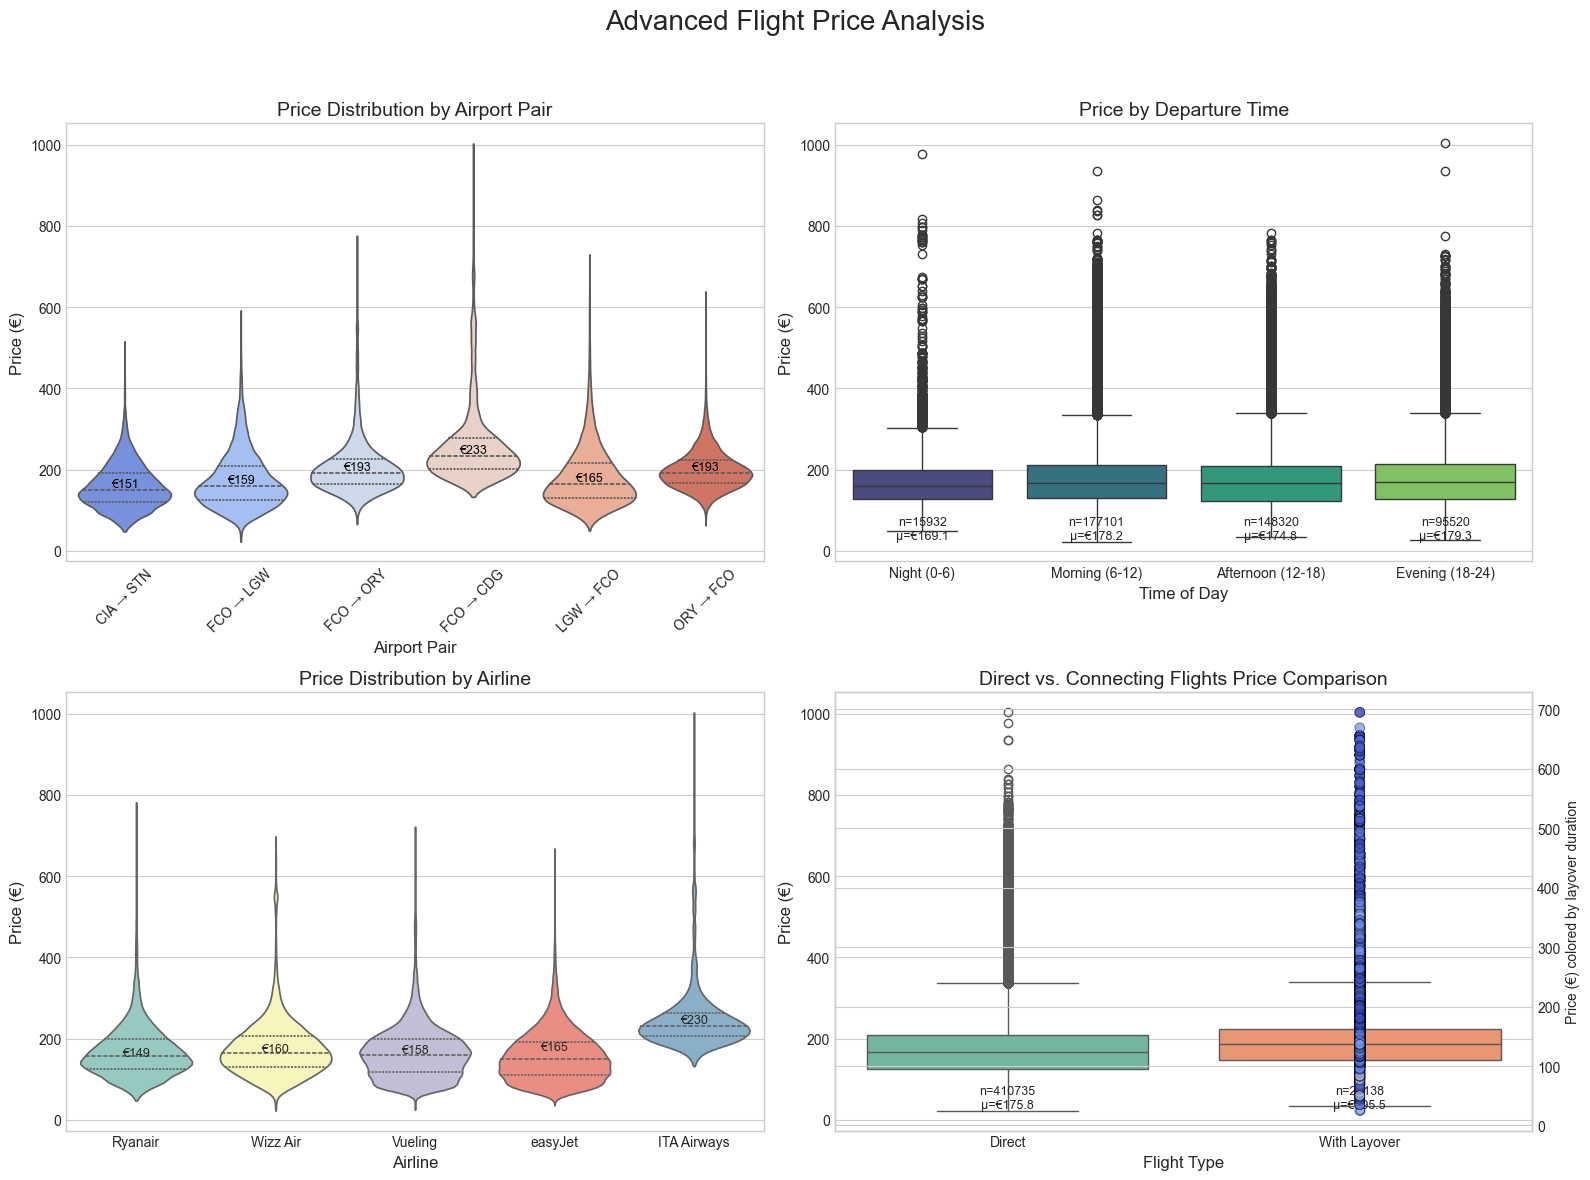

In [ ]:
fig4 = plot_advanced_flight_analysis(data)
plt.show()